In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

c:\Users\Juhana\scoop\apps\pyenv\current\pyenv-win\versions\3.11.0rc2\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports
require('ggplot2')
require('ggrepel')
require('readr')
require('tidyverse')
require('extrafont')


R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: ggrepel

R[write to console]: Loading required package: readr

R[write to console]: Loading required package: tidyverse



-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.4.1 
v purrr   1.0.1      v forcats 0.5.2 
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


R[write to console]: Loading required package: extrafont

R[write to console]: Registering fonts with R



In [7]:
df = pd.read_csv('filtered_airports.csv')
df.describe()

,latitude_deg,longitude_deg,elevation_ft,runway_count,max_runway,avg_runway
count,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000
mean,25.853778,-1.232915,1039.731600,1.485846,7565.004613,7058.194037
std,27.481213,85.404796,1656.791505,0.781939,2661.225875,2591.117720
min,-90.000000,-178.065994,-1266.000000,1.000000,984.000000,984.000000
25%,9.553375,-78.489403,75.000000,1.000000,5400.000000,4970.000000
50%,33.942501,6.462260,362.000000,1.000000,7448.000000,6761.000000
75%,45.727200,56.892700,1224.000000,2.000000,9678.000000,8999.250000
max,82.517799,179.339996,14472.000000,11.000000,16404.000000,16404.000000


In [8]:
df_ultra_high = df_filtered = df[df['elevation_ft'] > 7999]
df_high.describe()

,latitude_deg,longitude_deg,elevation_ft,runway_count,max_runway,avg_runway
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,6.920514,0.623593,10498.900000,1.200000,10690.875000,10350.341667
std,26.461748,85.542049,1940.721618,0.464095,2659.985456,2886.231169
min,-90.000000,-99.570358,8202.000000,1.000000,3635.000000,3346.666667
25%,-13.250025,-74.521648,8883.000000,1.000000,9172.000000,9172.000000
50%,2.781449,-65.506215,9974.500000,1.000000,10822.500000,10499.000000
75%,30.821700,97.750524,11822.750000,1.000000,12467.000000,12467.000000
max,37.573125,110.340000,14472.000000,3.000000,15748.000000,15748.000000


In [13]:
df_high = df_filtered = df[(df['elevation_ft'] > 4999) & (df['elevation_ft'] < 8000)]
df_high.describe()


,latitude_deg,longitude_deg,elevation_ft,runway_count,max_runway,avg_runway
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,20.740349,-14.000418,6042.020134,1.489933,8781.912752,8137.120805
std,21.755184,84.913031,779.189691,0.776491,2897.156551,2755.168590
min,-29.462299,-120.139999,5000.000000,1.000000,1969.000000,1969.000000
25%,5.029600,-105.116997,5431.000000,1.000000,7000.000000,6193.500000
50%,27.588301,27.552500,5778.000000,1.000000,8519.000000,7710.000000
75%,38.805801,44.238100,6649.000000,2.000000,10819.000000,10007.000000
max,46.534100,145.391998,7990.000000,6.000000,16000.000000,14425.000000


In [14]:
df_mid = df_filtered = df[(df['elevation_ft'] > 199) & (df['elevation_ft'] < 5000)]
df_mid.describe()


,latitude_deg,longitude_deg,elevation_ft,runway_count,max_runway,avg_runway
count,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000
mean,27.662739,-7.332663,1300.351941,1.506839,7588.674307,7047.395932
std,27.433987,79.799888,1148.908124,0.782606,2602.202095,2544.405992
min,-51.822800,-173.962006,200.000000,1.000000,1968.000000,1066.750000
25%,14.174300,-81.849800,446.000000,1.000000,5504.000000,5000.000000
50%,36.964500,4.795770,873.000000,1.000000,7403.000000,6726.000000
75%,46.969398,42.620899,1765.000000,2.000000,9501.000000,8858.500000
max,76.531197,176.317001,4989.000000,11.000000,16404.000000,16404.000000


In [12]:
df_low = df_filtered = df[(df['elevation_ft'] < 200)]
df_low.describe()

,latitude_deg,longitude_deg,elevation_ft,runway_count,max_runway,avg_runway
count,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000
mean,24.054308,8.541972,64.432533,1.461333,7367.468267,6917.800907
std,27.674618,92.116821,62.281568,0.785388,2659.349551,2573.730013
min,-77.867401,-178.065994,-1266.000000,1.000000,984.000000,984.000000
25%,7.610990,-74.384102,20.000000,1.000000,5009.000000,4802.750000
50%,27.977272,9.412280,49.000000,1.000000,7218.000000,6602.000000
75%,43.843497,100.279999,100.000000,2.000000,9445.500000,8868.000000
max,82.517799,179.339996,199.000000,7.000000,15912.000000,15000.000000


In [6]:
piv = df \
    .pivot_table(index='type',
                 values='elevation_ft', 
                 aggfunc=['mean', 'median', 'std', 'count'])
piv

,mean,median,std,count
,elevation_ft,elevation_ft,elevation_ft,elevation_ft
type,,,,
large_airport,764.973856,162.0,1508.581946,459
medium_airport,1068.992343,399.0,1669.299733,4310


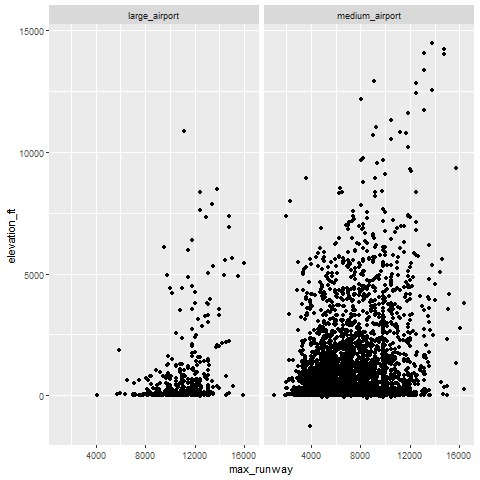

In [10]:
%%R -i df
# Plot + 
# Aesthetics
ggplot(df) +
    aes(x=max_runway, y=elevation_ft) +
    geom_point() +
    facet_wrap(~type) 

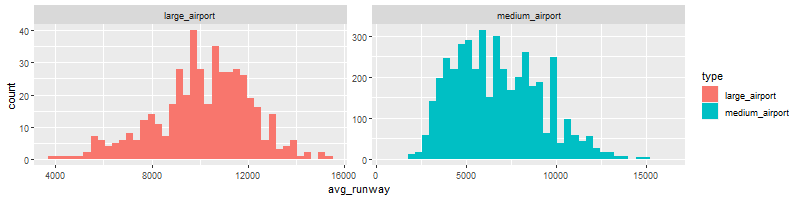

In [11]:
%%R -w 800 -h200

# Plot +
# Aesthetics + 
# Geom
ggplot(df) + 
    aes(x=avg_runway, fill=type) +
    geom_histogram(bins=40) +
    facet_wrap(~type, nrow=1, scales="free")

In [ ]:
piv = airports \
    .pivot_table(index='pollster', 
                 values='error', 
                 aggfunc=['mean', 'median', 'std', 'count']) \
    #.sort_values(by=('mean', 'error'))\

# filter out any pollster with less than 10 polls
piv[piv[('count','error')] > 10].tail(25)